In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from wordcloud import WordCloud
from PIL import Image

%matplotlib inline

In [2]:
FILE = 'data/survey_monkey_responses.csv'

df = pd.read_csv(FILE)

og_columns = df.columns

In [3]:
df.shape

(14, 9)

In [4]:
df.rename(columns={
    df.columns[0]: "q1",
    df.columns[1]: "q2",
    df.columns[2]: "q3",
    df.columns[3]: "q4",
    df.columns[4]: "q5",
    df.columns[5]: "q6",
    df.columns[6]: "q7",
    df.columns[7]: "q8",
    df.columns[8]: "q9"}, inplace=True)

df.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9
0,I think my DPI pilot team functions well toget...,"I believe my team has come along way, our comm...",NaN,NaN,No.,This has been a positive experience for me so ...,No.,NaN,I want them to be aware that this is not a eas...
1,"We work well together. However, sometimes it s...",None,Too many emails. It really gets hard to keep t...,"Honestly, we are sure he means well, and he se...",Mostly positive. See #4,Yes. Would definitely participate again. Ha! N...,No,For the most part but... See #1,See #1 More staffing is needed. We feel like w...
2,"Yes, we make things happen.",My team rocks!!!! We rally when things get tou...,Are there rules? I just go with ...ask for for...,I will be interested to see what they offer as...,Very stressful! Its starting to feel like sust...,"There have been some rough patches, to say the...",I'm not confused. I wonder though if leadershi...,Dilys helps relay information and works with u...,If you are okay with pulling DPI members out d...
3,Yes,I love working with my team.,DPI suggests we include PMQ pharmacy as a part...,I do not believe our coach understands the typ...,The experience has been stressful as the clini...,Its great that the clinic is looking to improv...,"I'm not confused as the goals are clear, howev...","Yes, they often ask if they can do anything to...",Id love for ELT leadership to shadow providers...
4,Yes we function well together. I-Team/Leadersh...,No comments on my team.,Rules and guidelines seem very,Our coach Ryan really adds a lot of stress to ...,Yes it has been very stressful as even though ...,It has been a positive experience in that we a...,It seems like everyone who isn't part of DPI a...,I-team has been helpful but leadership seems t...,I want leadership/I-Team to know that they nee...


In [5]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brandonkessler/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brandonkessler/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
def process_text(text, stop_words=set(stopwords.words('english'))):
    words = word_tokenize(text.lower())
    other_exclusions = ['us','yes','staff','need','feel','dpi',
                        'team','work','thing', 'things','seem',
                       'really','seems']
    
    filtered_words = []
    
    for word in words:
        if word not in stop_words and\
            word not in other_exclusions and word.isalpha():
            filtered_words.append(word.upper())
    
    return filtered_words

In [9]:
df.q1.dropna()

0     I think my DPI pilot team functions well toget...
1     We work well together. However, sometimes it s...
2                           Yes, we make things happen.
3                                                   Yes
4     Yes we function well together. I-Team/Leadersh...
5     I will say like most teams there is always som...
6             Yes because they open to everyone's ideas
7     Yes.. i feel very conferrable being open and s...
8     I LOVE my team! Different personalities but we...
9     YES...some were not fully committed and were u...
10    We do function well together sometimes there's...
11    I do think our team functions well together. W...
12                                we work well together
13    I believe my DPI team work well and we have a ...
Name: q1, dtype: object

In [8]:
q1

0             [THINK, PILOT, FUNCTIONS, WELL, TOGETHER]
1     [WELL, TOGETHER, HOWEVER, SOMETIMES, GET, SUPP...
2                                        [MAKE, HAPPEN]
3                                                    []
4     [FUNCTION, WELL, TOGETHER, INVOLVED, KNOW, GOI...
5     [SAY, LIKE, TEAMS, ALWAYS, OTHERS, END, PULL, ...
6                               [OPEN, EVERYONE, IDEAS]
7            [CONFERRABLE, OPEN, SHARING, IDEAS, MATES]
8     [LOVE, DIFFERENT, PERSONALITIES, BALANCE, BROU...
9             [FULLY, COMMITTED, USING, PERSONAL, TIME]
10    [FUNCTION, WELL, TOGETHER, SOMETIMES, PEOPLE, ...
11    [THINK, FUNCTIONS, WELL, TOGETHER, GOOD, LEADE...
12                                     [WELL, TOGETHER]
13                       [BELIEVE, WELL, GOOD, CAPTAIN]
Name: q1, dtype: object

In [10]:
all_q1 = " ".join([word for sublist in q1 for word in sublist])
all_q1

'THINK PILOT FUNCTIONS WELL TOGETHER WELL TOGETHER HOWEVER SOMETIMES GET SUPPORT ORDER GET PROJECTS RRTS IE TRAIN MAS MEMBERS GET PULLED PROVIDERS MESSING FLOW MAKE HAPPEN FUNCTION WELL TOGETHER INVOLVED KNOW GOING EVERY RRT SAY LIKE TEAMS ALWAYS OTHERS END PULL TOGETHER WHOLE OPEN EVERYONE IDEAS CONFERRABLE OPEN SHARING IDEAS MATES LOVE DIFFERENT PERSONALITIES BALANCE BROUGHT DIFFERENT STRENGTHS LEVERS ADMIN PERSONNEL ASSIGNED COULD BIT INVESTED BELIEVE HELPFUL FULLY COMMITTED USING PERSONAL TIME FUNCTION WELL TOGETHER SOMETIMES PEOPLE EXTRA REMINDERS ORDER GET DONE GOOD REMINDING WORKING TOGETHER GET DONE THINK FUNCTIONS WELL TOGETHER GOOD LEADER LEARNING EXPERIENCE PERFORMING WELL STILL SOMETIMES UNSURE SUPPOSED SOMETIMES COME MEETINGS OBSERVE SOMETIMES ASK MAKE RRTS HAPPEN OFTEN GO FIND GIVE UPDATES WELL TOGETHER BELIEVE WELL GOOD CAPTAIN'

In [78]:
q1 = df.q1.dropna().apply(process_text)
all_q1 = " ".join([word for sublist in q1 for word in sublist])

q2 = df.q2.dropna().apply(process_text)
all_q2 = " ".join([word for sublist in q2 for word in sublist])

q3 = df.q3.dropna().apply(process_text)
all_q3 = " ".join([word for sublist in q3 for word in sublist])

q4 = df.q4.dropna().apply(process_text)
all_q4 = " ".join([word for sublist in q4 for word in sublist])

q5 = df.q5.dropna().apply(process_text)
all_q5 = " ".join([word for sublist in q5 for word in sublist])

q6 = df.q6.dropna().apply(process_text)
all_q6 = " ".join([word for sublist in q6 for word in sublist])

q7 = df.q7.dropna().apply(process_text)
all_q7 = " ".join([word for sublist in q7 for word in sublist])

q8 = df.q8.dropna().apply(process_text)
all_q8 = " ".join([word for sublist in q8 for word in sublist])

q9 = df.q9.dropna().apply(process_text)
all_q9 = " ".join([word for sublist in q9 for word in sublist])

In [79]:
all_words = all_q1 + all_q2 + all_q3 + all_q4 + all_q5 + all_q6 + all_q7 + all_q8 + all_q9

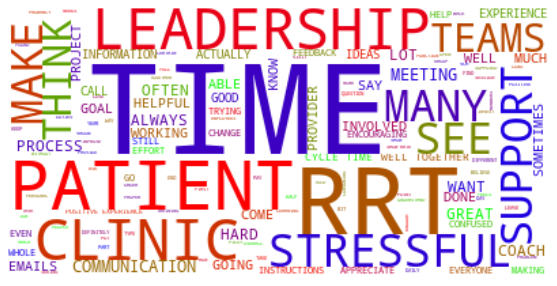

In [96]:
wc_all_words = WordCloud(background_color='white', max_words=5000, colormap='brg').generate(all_words)
plt.figure(figsize=[10, 5])
plt.imshow(wc_all_words, interpolation='bilinear')
plt.axis('off')
plt.show()